## Random Forest Classfier
References: 

1. https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
2. https://towardsdatascience.com/understanding-random-forest-58381e0602d2

Data: Iris Flower Dataset
Samples: 150
Number of flowers: 3
Features: 4

The features are petal length, petal width, sepal length and sepal width

Problem: Which feature is best for classifying the dataset?


## Let's see how the features are distributed

/home/polo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/polo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/polo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<Figure size 4000x800 with 0 Axes>

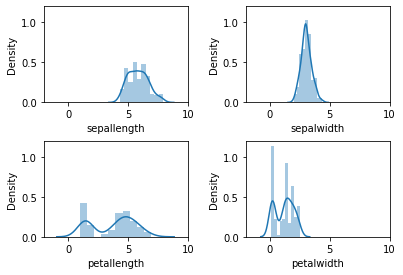

In [3]:
from sklearn import datasets
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Loading the iris plants dataset (classification)
iris = datasets.load_iris()

# creating dataframe of IRIS dataset
data = pd.DataFrame({"sepallength": iris.data[:, 0], "sepalwidth": iris.data[:, 1],
                     "petallength": iris.data[:, 2], "petalwidth": iris.data[:, 3],
                     "species": iris.target})


figure(figsize=(50, 10), dpi=80)

fig, axes = plt.subplots(nrows=2, ncols=2)

custom_xlim = (-2, 10)
custom_ylim = (0, 1.2)
plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

features=['sepallength','sepalwidth', 'petallength', 'petalwidth']
sns.distplot(data[features[0]],bins=10, ax=axes[0,0])
##axes[0, 0].set_title(features[0])

sns.distplot(data[features[1]],bins=10, ax=axes[0,1])
##axes[0, 1].set_title(features[1])

sns.distplot(data[features[2]],bins=10, ax=axes[1,0])
##axes[1, 0].set_title(features[2])

sns.distplot(data[features[3]],bins=10, ax=axes[1,1])
##axes[1, 1].set_title(features[3])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


## Observations: 

1. Sepal length and width have unimodal distributions (single peak,limited fluctuations and well-defined)
2. Petal length and width have bimodal distributions (2 peaks, many fluctuations and not well-defined)

General understanding: Flower petals have higher heterogeneity in their shape.

Now, we turn to the Random Forest Classfier to determine which feature classifies the Iris flower dataset in the best way. 


In [7]:
# dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)

# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
clf.fit(X_train, y_train)
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp


ACCURACY OF THE MODEL:  1.0


petal length (cm)    0.432837
petal width (cm)     0.426125
sepal length (cm)    0.111167
sepal width (cm)     0.029870
dtype: float64

## Observations from ML-Random Forest

1. Model performs really well (90-100% accuracy)
2. Petal dimensions are more useful in classifying the dataset in comparsion to sepal dimensions

Is there a co-relation between the variance of the features and its importance?

In [8]:
for i in range(len(features)):

    print("Variance of " + str(features[i]) + ' is ' + str(data[features[i]].var()))

Variance of sepallength is 0.6856935123042507
Variance of sepalwidth is 0.189979418344519
Variance of petallength is 3.116277852348993
Variance of petalwidth is 0.5810062639821029


## Conclusion

1. The petal length feature has the highest variance and is the most important feature for random forest classification.
2. Although petal width has a smaller variance as compared to sepal length, it is a more important feature. 
Why? : The density distribution for petal width is bimodal. This could mean that this feature is sampling 2 different behaviors in the dataset, and hence serves as a superior classfier. 
    On the other hand, the sepal length feature has a unimodal distribiution. This could mean that it is sampling something which is the same for all of the 150 samples in the dataset.